# **THE IMPORTANCE OF DATA**
---
<img src="Imperial_logo.png" align = "left" width=200>
 <br><br>
 
- Copyright (c) Antoine Jacquier, 2024. All rights reserved

- Author: Jack Jacquier <a.jacquier@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.9

## Some topical data problems.....

### NHS COVID DATA October 2020
https://www.bbc.co.uk/news/uk-54422505

Run the following cell, first with N = 100, then with N = 1,100,000, and open the two csv files in Excel. What happens?

In [1]:
import numpy as np
import csv

In [2]:
N = 1000
N = 1100000
xx = np.random.normal(0.,1.,N)
fileName = "DataFile" + str(N) + ".csv"

with open(fileName, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Index", "X"])
    for (i,x) in enumerate(xx):
        writer.writerow([i, x])

Is N = 1 million a large number?

### Missing data


Let us look at FX data between GBP and EUR: https://www.truefx.com/truefx-historical-downloads/#66-67-january-1580847539

In [3]:
import pandas as pd
df = pd.read_csv("../Data files/EURGBP-2020-01.csv", header = None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723108 entries, 0 to 1723107
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       object 
 1   1       object 
 2   2       float64
 3   3       float64
dtypes: float64(2), object(2)
memory usage: 52.6+ MB


Looking at the top five rows

In [4]:
df.head()

0                      1        2        3
0  EUR/GBP  20200101 22:00:32.963  0.84488  0.84737
1  EUR/GBP  20200101 22:00:54.395  0.84484  0.84760
2  EUR/GBP  20200101 22:01:18.477  0.84485  0.84748
3  EUR/GBP  20200101 22:01:19.170  0.84489  0.84746
4  EUR/GBP  20200101 22:01:21.112  0.84489  0.84752

Looking at the bottom five rows

In [5]:
df.tail()

0                      1        2        3
1723103  EUR/GBP  20200131 20:59:58.885  0.83984  0.83992
1723104  EUR/GBP  20200131 20:59:59.067  0.83984  0.83991
1723105  EUR/GBP  20200131 20:59:59.248  0.83984  0.83992
1723106  EUR/GBP  20200131 20:59:59.586  0.83983  0.83991
1723107  EUR/GBP  20200131 20:59:59.650  0.83982  0.83990

Cleaning and visualising (more on `pandas` and dataframe in a different `jupyter notebook`)

In [6]:
df = df.drop([0], axis=1)
df.columns = ["Date", "Bid", "Ask"]
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")

df[["Bid", "Ask"]].plot(style=".");

### Misleading Visualisation (often on purpose)
https://venngage.com/blog/misleading-graphs/

## Where to find data?

Internet is a goldmine for data. Not all data are free, but a large amount, on every topic, is (subject to copyright). We indicate below a few such sources that might be of interest in the context of Economics / Finance, as well as a few others (to broaden your horizons beyond the lure of the financial industry):
- <a href="https://docs.quandl.com/"> Quandl</a>:  vast collection of economic, financial, and market data collected from a wide variety of sources.
- <a href="https://trends.google.com/trends/?geo=UK"> Google Trends</a>
- Be careful with <a href="https://ico.org.uk/for-organisations/guide-to-data-protection/guide-to-the-general-data-protection-regulation-gdpr/key-definitions/what-is-personal-data/">Personal data</a> and <a href="http://www.oecd.org/sti/intellectual-property-statistics-and-analysis.htm">Intellectual property</a>. Legal issues may arise....
- <a href="https://uk.finance.yahoo.com/">Yahoo Finance </a>

## `yahoo_fin`

`yahoo_fin` is a package to download lots of financial data on companies and traded stocks, indices, ...
https://pypi.org/project/yahoo-fin/

The functions in `yahoo_fin` are grouped into two modules:
- `stock_info`
- `options`
- 

### The `stock_info` package


In [8]:
## %pip install yahoo_fin

In [9]:
import yahoo_fin.stock_info as si

In [10]:
aapl = si.get_data("aapl") # gets Apple data
aapl.head()

open      high       low     close  adjclose     volume ticker
1980-12-12  0.128348  0.128906  0.128348  0.128348  0.098943  469033600   AAPL
1980-12-15  0.122210  0.122210  0.121652  0.121652  0.093781  175884800   AAPL
1980-12-16  0.113281  0.113281  0.112723  0.112723  0.086898  105728000   AAPL
1980-12-17  0.115513  0.116071  0.115513  0.115513  0.089049   86441600   AAPL
1980-12-18  0.118862  0.119420  0.118862  0.118862  0.091630   73449600   AAPL

In [11]:
aapl.tail()

open        high         low       close    adjclose  \
2024-10-28  233.320007  234.729996  232.550003  233.399994  233.399994   
2024-10-29  233.100006  234.330002  232.320007  233.669998  233.669998   
2024-10-30  232.610001  233.470001  229.550003  230.100006  230.100006   
2024-10-31  229.339996  229.830002  225.369995  225.910004  225.910004   
2024-11-01  220.970001  225.350006  220.270004  222.910004  222.910004   

              volume ticker  
2024-10-28  36087100   AAPL  
2024-10-29  35417200   AAPL  
2024-10-30  47070900   AAPL  
2024-10-31  64370100   AAPL  
2024-11-01  65242200   AAPL

You can also pull data for a specific date range, as follows:

In [12]:
si.get_data("amzn", start_date = "01/01/2017", end_date = "01/31/2017")

open       high        low      close   adjclose     volume  \
2017-01-03  37.896000  37.938000  37.384998  37.683498  37.683498   70422000   
2017-01-04  37.919498  37.984001  37.709999  37.859001  37.859001   50210000   
2017-01-05  38.077499  39.119999  38.013000  39.022499  39.022499  116602000   
2017-01-06  39.118000  39.972000  38.924000  39.799500  39.799500  119724000   
2017-01-09  39.900002  40.088501  39.588501  39.846001  39.846001   68922000   
2017-01-10  39.830002  39.900002  39.477001  39.794998  39.794998   51168000   
2017-01-11  39.682999  39.974998  39.475498  39.951000  39.951000   59856000   
2017-01-12  40.015499  40.706501  39.974998  40.681999  40.681999   97478000   
2017-01-13  40.716000  41.082500  40.570000  40.856998  40.856998   75838000   
2017-01-17  40.785000  40.799999  40.172001  40.486000  40.486000   73410000   
2017-01-18  40.474998  40.586498  40.213501  40.374001  40.374001   47084000   
2017-01-19  40.500000  40.675499  40.366001  40.452000  40.452000   50816000   
2017-01-20  40.764000  40.800999  40.313000  40.416500  40.416500   67524000   
2017-01-23  40.340000  40.924999  40.254002  40.894001  40.894001   55950000   
2017-01-24  41.099998  41.199501  40.724998  41.122002  41.122002   59434000   
2017-01-25  41.289501  41.870998  41.264500  41.826000  41.826000   78452000   
2017-01-26  41.776501  42.192001  41.650002  41.957500  41.957500   71726000   
2017-01-27  41.950001  41.985001  41.472000  41.788502  41.788502   59974000   
2017-01-30  41.650002  41.674999  40.819000  41.519001  41.519001   74946000   

           ticker  
2017-01-03   AMZN  
2017-01-04   AMZN  
2017-01-05   AMZN  
2017-01-06   AMZN  
2017-01-09   AMZN  
2017-01-10   AMZN  
2017-01-11   AMZN  
2017-01-12   AMZN  
2017-01-13   AMZN  
2017-01-17   AMZN  
2017-01-18   AMZN  
2017-01-19   AMZN  
2017-01-20   AMZN  
2017-01-23   AMZN  
2017-01-24   AMZN  
2017-01-25   AMZN  
2017-01-26   AMZN  
2017-01-27   AMZN  
2017-01-30   AMZN

**Question:** Why are 2017/01/01 and 2017/01/02 missing?

You can also get the list of all the tickers in the S&P 500:

In [13]:
listTickers = si.tickers_sp500()

Note: recent versions of `pandas` are not compatible anymore with some of `yahoo_fin` capabilities. The following works with `pandas`<2, so you may want to downgrade with
`pip install "pandas<2"`

Otherwise, a full list of tickers (as a csv downloadable file) is available at
http://www.nasdaq.com/screening/companies-by-name.aspx?letter=0&exchange=nasdaq&render=download 

In [14]:
len(listTickers)

503

You can get the live price

In [15]:
import numpy as np
n = np.random.randint(0, len(listTickers))

In [16]:
ticker = listTickers[n]
print("Index chosen:", n, "|| Ticker:", ticker)

Index chosen: 101 || Ticker: ---


In [17]:
ticker = "GOOG"
si.get_live_price(ticker) 

C:\Users\ajacquie\AppData\Local\anaconda3\Lib\site-packages\yahoo_fin\stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]


172.64999389648438

You can also get a quote table

In [ ]:
si.get_quote_table(ticker, dict_result = False)

In [ ]:
# most active stocks on the day
si.get_day_most_active()
 
# best stocks
#si.get_day_gainers()
 
# worst stocks
#si.get_day_losers()

#### Scraping financial data
Financials, such as income statements, balance sheets, and cash flows can be scraped using `yahoo_fin`.

In [ ]:
income_statement = si.get_income_statement(ticker)
balance_sheet = si.get_balance_sheet(ticker)
cash_flow = si.get_cash_flow(ticker)

income_statement
#print(balance_sheet)
#print(cash_flow)

#### Getting major stock holders
Getting the major holders of a stock can be done with the get_holders function.

In [ ]:
holders = si.get_holders(ticker)

This returns a dictionary. We can check the keys:

In [ ]:
holders.keys()

and the values are `pandas` dataframes (another session).
We can return the top institutional holder:

In [ ]:
info = holders["Top Institutional Holders"]
print("The top institutional hold is %s and owns %i dollars" %(info.Holder[0],info.Value[0]))

Examples on other indices:

In [ ]:
# get list of Dow stocks
dow_list = si.tickers_dow()
 
# get list of NASDAQ stocks
nasdaq_list = si.tickers_nasdaq()

### The `options` package

In [22]:
from yahoo_fin import options

Get all the expirations date for the options on a given stock

In [23]:
ticker = "GOOG"

maturities = options.get_expiration_dates(tickername)
maturities

[]

Importing all the options on a given stock on a given maturity

In [ ]:
chain = options.get_options_chain(ticker)
calls = chain["calls"]
puts = chain["puts"]
calls.tail()

In [ ]:
si.get_live_price("amzn") 

To get the options for a specific maturity:

In [ ]:
T = maturities[4]
T

In [ ]:
allOptionsT = options.get_options_chain(ticker, T)
allCallsT = options.get_calls(ticker, T)
allPutsT = options.get_puts(ticker, T)

Getting the options for each maturity (*takes some time*)

In [ ]:
info = {}
#for date in maturities:
#    info[date] = options.get_options_chain(ticker, date)

------

## `yfinance`

Unofficial "Yahoo Finance" API.

Full details at https://pypi.org/project/yfinance/

"Yahoo Finance" used to have their own official API, but this was decommissioned in May 2017.

Pros of `yfinance`:
- Free
- Quick and easy to set yourself up
- Simple
- High granularity of data (1min/2min/5min data)
- Returns data directly in `pandas` dataframes/series


Cons of `yfinance`:
- Lacks specialised features
- Some methods are fragile
- Unofficial / not necessarily maintained

In [24]:
import yfinance as yf

In [32]:
ticker = "AMZN"
yf_ticker = yf.Ticker(ticker)

In [34]:
# get all stock info
yf_ticker.info

{'address1': '410 Terry Avenue North',
 'city': 'Seattle',
 'state': 'WA',
 'zip': '98109-5210',
 'country': 'United States',
 'phone': '206 266 1000',
 'website': 'https://www.aboutamazon.com',
 'industry': 'Internet Retail',
 'industryKey': 'internet-retail',
 'industryDisp': 'Internet Retail',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': "Amazon.com, Inc. engages in the retail sale of consumer products, advertising, and subscriptions service through online and physical stores in North America and internationally. The company operates through three segments: North America, International, and Amazon Web Services (AWS). It also manufactures and sells electronic devices, including Kindle, Fire tablets, Fire TVs, Echo, Ring, Blink, and eero; and develops and produces media content. In addition, the company offers programs that enable sellers to sell their products in its stores; and programs that allow auth

In [35]:
start_date = "2017-01-01"
end_date = "2017-01-31"
print("Ticker: ", ticker)
df = yf.download(ticker,start_date, end_date, auto_adjust=True)['Close']
df.head()

[*********************100%%**********************]  1 of 1 completed

Ticker:  AMZN


Date
2017-01-03    37.683498
2017-01-04    37.859001
2017-01-05    39.022499
2017-01-06    39.799500
2017-01-09    39.846001
Name: Close, dtype: float64

Downloading multiple tickers at once:

In [37]:
tickers = "MA,V,AMZN,JPM,BA".split(",")
df_mult = yf.download(tickers,start_date, end_date, auto_adjust=True)['Close']
df_mult.head()

[*********************100%%**********************]  5 of 5 completed


Ticker           AMZN          BA        JPM          MA          V
Date                                                               
2017-01-03  37.683498  145.533676  69.970314  100.618576  75.357590
2017-01-04  37.859001  147.063461  70.099358  101.573288  75.973724
2017-01-05  39.022499  147.146896  69.454109  102.357796  76.864738
2017-01-06  39.799500  147.508499  69.462158  103.094452  77.926392
2017-01-09  39.846001  146.785309  69.510559  102.893555  77.490372

Examples of useful information:

In [39]:
# show holders
yf_ticker.institutional_holders

Date Reported                             Holder  pctHeld     Shares  \
0    2023-06-30                 Vanguard Group Inc   0.0704  725913766   
1    2023-06-30                     Blackrock Inc.   0.0592  610884370   
2    2023-06-30           State Street Corporation   0.0326  335869897   
3    2023-06-30                           FMR, LLC   0.0272  280451570   
4    2023-06-30      Price (T.Rowe) Associates Inc   0.0210  216527383   
5    2023-06-30      Geode Capital Management, LLC   0.0165  170151722   
6    2023-06-30                     Morgan Stanley   0.0145  149603480   
7    2023-06-30          JP Morgan Chase & Company   0.0131  134806503   
8    2022-12-31  Norges Bank Investment Management   0.0095   98376088   
9    2023-06-30  Capital Research Global Investors   0.0095   98110530   

         Value  
0  94630118535  
1  79634886473  
2  43783999772  
3  36559666665  
4  28226509647  
5  22180978479  
6  19502309652  
7  17573375731  
8   8263591392  
9  12789688690

In [40]:
## News (for sentiment analysis for example)
yf_ticker.news

[{'uuid': '0d1c31c0-0995-335d-9473-c6ee9ed5c8ce',
  'title': 'Is Amazon Falling Behind on AI? It Might Not Matter After Its Latest Quarter',
  'publisher': 'Motley Fool',
  'link': 'https://finance.yahoo.com/m/0d1c31c0-0995-335d-9473-c6ee9ed5c8ce/is-amazon-falling-behind-on.html',
  'providerPublishTime': 1730721000,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/9VBIjF2xzU7np3IX9MJQsQ--~B/aD05MzM7dz0xNDAwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/motleyfool.com/bee9319f3b7d388e77356f62e2ac5a70',
     'width': 1400,
     'height': 933,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/EIAvmOJ9hAOR0hf1vqXhNQ--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/motleyfool.com/bee9319f3b7d388e77356f62e2ac5a70',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['AMZN']},
 {'uuid': 'ec22624b-6624-3652-9d79-f8fa4b0f87fa',
  'title': 'Amazon and Walm

#### Options

In [41]:
## List of maturities available
yf_ticker.options

('2024-11-08',
 '2024-11-15',
 '2024-11-22',
 '2024-11-29',
 '2024-12-06',
 '2024-12-13',
 '2024-12-20',
 '2025-01-17',
 '2025-02-21',
 '2025-03-21',
 '2025-04-17',
 '2025-06-20',
 '2025-08-15',
 '2025-09-19',
 '2025-12-19',
 '2026-01-16',
 '2026-06-18',
 '2026-12-18',
 '2027-01-15')

In [42]:
# get option chain for specific expiration
ticker_options = yf_ticker.option_chain(yf_ticker.options[2])
ticker_options

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice  bid  \
0   AMZN241122C00100000 2024-10-21 14:04:57+00:00   100.0      88.03  0.0   
1   AMZN241122C00110000 2024-11-01 14:05:45+00:00   110.0      88.25  0.0   
2   AMZN241122C00120000 2024-10-31 15:39:57+00:00   120.0      67.09  0.0   
3   AMZN241122C00125000 2024-11-01 15:31:05+00:00   125.0      75.25  0.0   
4   AMZN241122C00130000 2024-11-01 16:21:49+00:00   130.0      69.25  0.0   
5   AMZN241122C00135000 2024-11-01 13:33:49+00:00   135.0      65.04  0.0   
6   AMZN241122C00140000 2024-11-01 17:31:57+00:00   140.0      58.84  0.0   
7   AMZN241122C00145000 2024-10-31 19:31:25+00:00   145.0      42.02  0.0   
8   AMZN241122C00150000 2024-11-01 17:11:47+00:00   150.0      48.10  0.0   
9   AMZN241122C00155000 2024-11-01 14:46:41+00:00   155.0      44.60  0.0   
10  AMZN241122C00160000 2024-11-01 19:53:48+00:00   160.0      38.10  0.0   
11  AMZN241122C00165000 2024-11-01 19:53:48+00:00   165.0     

In [43]:
ticker_options.calls.head()

contractSymbol             lastTradeDate  strike  lastPrice  bid  ask  \
0  AMZN241122C00100000 2024-10-21 14:04:57+00:00   100.0      88.03  0.0  0.0   
1  AMZN241122C00110000 2024-11-01 14:05:45+00:00   110.0      88.25  0.0  0.0   
2  AMZN241122C00120000 2024-10-31 15:39:57+00:00   120.0      67.09  0.0  0.0   
3  AMZN241122C00125000 2024-11-01 15:31:05+00:00   125.0      75.25  0.0  0.0   
4  AMZN241122C00130000 2024-11-01 16:21:49+00:00   130.0      69.25  0.0  0.0   

   change  percentChange  volume  openInterest  impliedVolatility  inTheMoney  \
0     0.0            0.0     NaN             0            0.00001        True   
1     0.0            0.0   394.0             0            0.00001        True   
2     0.0            0.0     1.0             0            0.00001        True   
3     0.0            0.0     3.0             0            0.00001        True   
4     0.0            0.0     4.0             0            0.00001        True   

  contractSize currency  
0      REGULAR      USD  
1      REGULAR      USD  
2      REGULAR      USD  
3      REGULAR      USD  
4      REGULAR      USD

## `quandl`
Quandl (https://www.quandl.com/) is self-described as *"The premier source for financial, economic, and alternative datasets, serving investment professionals. Quandl's platform is used by over 400,000 people, including analysts from the world's top hedge funds, asset managers and investment banks."* Some of the data on Quandl is available to their institutional clients only, whereas other datasets are open to everyone.

Need to create an account (free) to get an api.

Data from quandl: for example, the Federal Reserve Economic Data (FRED):

* Natural Rate of Unemployment (Short-Term) (FRED/NROUST)
* Real Potential Gross Domestic Product (FRED/GDPPOT)
* Nominal Potential Gross Domestic Product (FRED/NGDPPOT)
* Natural Rate of Unemployment (Long-Term) (FRED/NROU)
* FOMC Summary of Economic Projections for the Civilian Unemployment Rate, Median (FRED/UNRATEMD)
* FOMC Summary of Economic Projections for the Growth Rate of Real Gross Domestic Product, Median (FRED/GDPC1MD)
* FOMC Summary of Economic Projections for the Personal Consumption Expenditures Inflation Rate, Median (FRED/PCECTPIMD)
* FOMC Summary of Economic Projections for the Personal Consumption Expenditures less Food and Energy Inflation Rate, Median (FRED/JCXFEMD)
* FOMC Summary of Economic Projections for the Fed Funds Rate, Range, Low (FRED/FEDTARRL)
* FOMC Summary of Economic Projections for the Fed Funds Rate, Range, Midpoint (FRED/FEDTARRM)
* FOMC Summary of Economic Projections for the Fed Funds Rate, Range, High (FRED/FEDTARRH)
* ...


## `fredapi`

#### Question: is there a relationship between the unemployment rate and the value of the S&P 500?


In [30]:
import yahoo_fin.stock_info as si
import datetime as dt
import matplotlib.pylab as plt

snp500 = si.get_data("^GSPC")

In [31]:
snp500.head()

open       high        low      close   adjclose    volume ticker
1970-03-25   0.0  91.070000  88.110001  89.769997  89.769997  17500000  ^GSPC
1970-03-26   0.0  90.650002  89.180000  89.919998  89.919998  11350000  ^GSPC
1970-03-30   0.0  90.410004  88.910004  89.629997  89.629997   9600000  ^GSPC
1970-03-31   0.0  90.169998  88.849998  89.629997  89.629997   8370000  ^GSPC
1970-04-01   0.0  90.620003  89.300003  90.070000  90.070000   9810000  ^GSPC

In [9]:
from fredapi import Fred
from tqdm import tqdm

def get_fred_series(api_key, series_info):
    """
    Extract data series from FRED using fredapi.
    - api_key (str): FRED API key
    - series_info (dict): dictionary with series IDs as keys and custom names as values.

    Returns:
    - DataFramewith data from all provided series.
    """
    fred_data = Fred(api_key=api_key)
    
    first_series_id = list(series_info.keys())[0]
    df_final = fred_data.get_series(first_series_id).to_frame(series_info[first_series_id]).rename_axis('date').reset_index()

    for series_id in tqdm(list(series_info.keys())[1:], desc="Downloading data"):
        temp_df = fred_data.get_series(series_id).to_frame(series_info[series_id]).rename_axis('date').reset_index()
        df_final = df_final.merge(temp_df, on='date', how='outer')  # 'outer' is used to include all dates

    df_final = df_final.sort_values(by='date').reset_index(drop=True)
    
    return df_final

In [10]:
age_series_info = {
    "UNRATE": "overall_rate",        # Overall U.S. unemployment rate
    "LNS14000086": "age_16_17_rate", # Rate for ages 16-17
    "LNS14000012": "age_16_19_rate", # Rate for ages 16-19
    "LNS14000088": "age_18_19_rate", # Rate for ages 18-19
    "LNS14024887": "age_16_24_rate", # Rate for ages 16-24
    "LNS14000036": "age_20_24_rate", # Rate for ages 20-24
    "LNS14000089": "age_25_34_rate", # Rate for ages 25-34
    "LNS14000060": "age_25_54_rate", # Rate for ages 25-54
    "LNS14000091": "age_35_44_rate", # Rate for ages 35-44
    "LNS14000093": "age_45_54_rate", # Rate for ages 45-54
    "LNS14000024": "age_20plus_rate",# Rate for ages 20 and above
    "LNS14000048": "age_25plus_rate",# Rate for ages 25 and above
    "LNS14024230": "age_55plus_rate",# Rate for ages 55 and above
}

In [11]:
myfredapi = ""
df_unemployment_rates = get_fred_series(myfredapi, age_series_info)

In [26]:
df_unemployment_rates = df_unemployment_rates.set_index("date")
df_unemployment_rates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 922 entries, 1948-01-01 to 2024-10-01
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall_rate     922 non-null    float64
 1   age_16_17_rate   922 non-null    float64
 2   age_16_19_rate   922 non-null    float64
 3   age_18_19_rate   922 non-null    float64
 4   age_16_24_rate   922 non-null    float64
 5   age_20_24_rate   922 non-null    float64
 6   age_25_34_rate   922 non-null    float64
 7   age_25_54_rate   922 non-null    float64
 8   age_35_44_rate   922 non-null    float64
 9   age_45_54_rate   922 non-null    float64
 10  age_20plus_rate  922 non-null    float64
 11  age_25plus_rate  922 non-null    float64
 12  age_55plus_rate  922 non-null    float64
dtypes: float64(13)
memory usage: 100.8 KB


In [49]:
startdate_both = max(snp500.index[0], df_unemployment_rates.index[0])
snp500 = snp500.loc[startdate_both:]
df_unemployment_rates = df_unemployment_rates.loc[startdate_both:]

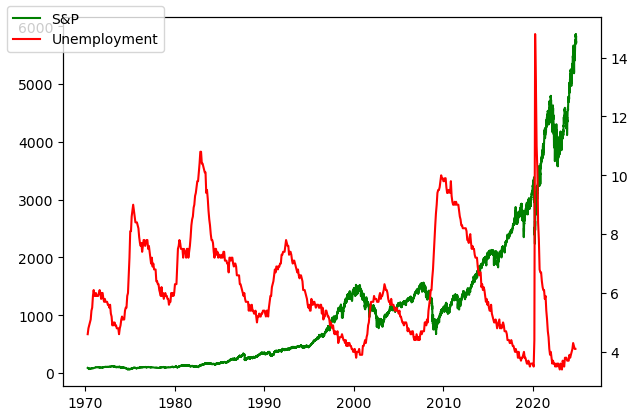

In [50]:
fig, ax1 = plt.subplots()
ax1.plot(snp500.index, snp500['close'], color='green', label="S&P")
ax2 = ax1.twinx()
ax2.plot(df_unemployment_rates.index, df_unemployment_rates["overall_rate"], color='red', label="Unemployment")
fig.tight_layout()
fig.subplots_adjust(bottom=0.2)
fig.legend(loc="upper left");

----------

## Alpha Vantage
Free API for real-time and historical stock and FX data, digital/crypto currency data, and many technical indicators

https://www.alphavantage.co/

It offers higher frequency data than Yahoo! Finance.

In [51]:
##!pip install alpha_vantage

In [137]:
my_alphavantage_api = "" ## you need to obtain (for free) an API on their website

Then, to download minute AAPL data,

In [55]:
from alpha_vantage.timeseries import TimeSeries

ts = TimeSeries(key=my_alphavantage_api, output_format='pandas')

intraday_data, data_info = ts.get_intraday('AAPL', outputsize='full', interval='1min')

In [56]:
data_info

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'AAPL',
 '3. Last Refreshed': '2024-11-01 19:59:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [57]:
intraday_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20990 entries, 2024-11-01 19:59:00 to 2024-10-03 04:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    20990 non-null  float64
 1   2. high    20990 non-null  float64
 2   3. low     20990 non-null  float64
 3   4. close   20990 non-null  float64
 4   5. volume  20990 non-null  float64
dtypes: float64(5)
memory usage: 983.9 KB


In [58]:
intraday_data.head()

1. open  2. high    3. low  4. close  5. volume
date                                                                 
2024-11-01 19:59:00  222.6101   222.72  222.6101    222.72     1855.0
2024-11-01 19:58:00  222.6200   222.72  222.5900    222.63      286.0
2024-11-01 19:57:00  222.5700   222.73  222.5500    222.60     1626.0
2024-11-01 19:56:00  222.5600   222.73  222.5500    222.59      222.0
2024-11-01 19:55:00  222.6100   222.64  222.6000    222.60      347.0

(array([20001., 20005., 20009., 20013., 20017., 20021., 20025., 20028.]),
 [Text(20001.0, 0, '2024-10-05'),
  Text(20005.0, 0, '2024-10-09'),
  Text(20009.0, 0, '2024-10-13'),
  Text(20013.0, 0, '2024-10-17'),
  Text(20017.0, 0, '2024-10-21'),
  Text(20021.0, 0, '2024-10-25'),
  Text(20025.0, 0, '2024-10-29'),
  Text(20028.0, 0, '2024-11-01')])

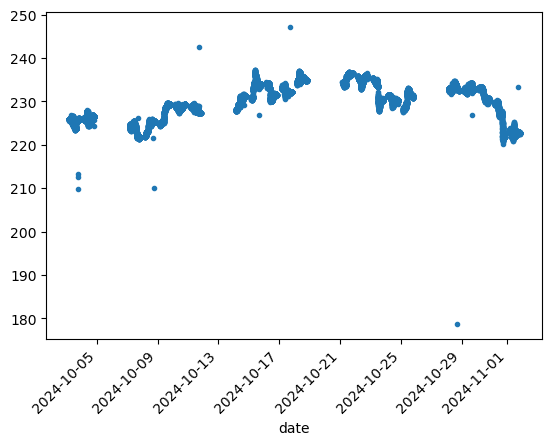

In [59]:
intraday_data['4. close'].plot(style=".")
plt.xticks(rotation=45)

## Webscraping


In [60]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import numpy as np

### Read data from webpage


In [61]:
url = "https://en.wikipedia.org/wiki/BNP_Paribas"
content = requests.get(url).content
soup = BeautifulSoup(content,'html.parser')

In [62]:
atags = soup.find_all("a") ## Viewing all data embedded in a tag

In [63]:
## Extracts only the relevant table
table = soup.find_all(class_="wikitable")[0]
print("The html version of the table from the Wikipedia page reads: ")
print("**********************")
print(table.prettify()) ##  The prettify command adds indentation
print("**********************")

The html version of the table from the Wikipedia page reads: 
**********************
<table class="wikitable">
 <caption>
  <b>
   Financial data in € billions
  </b>
  <sup class="reference" id="cite_ref-38">
   <a href="#cite_note-38">
    <span class="cite-bracket">
     [
    </span>
    38
    <span class="cite-bracket">
     ]
    </span>
   </a>
  </sup>
 </caption>
 <tbody>
  <tr>
   <th>
    Year
   </th>
   <th>
    2013
   </th>
   <th>
    2014
   </th>
   <th>
    2015
   </th>
   <th>
    2016
   </th>
   <th>
    2017
   </th>
   <th>
    2018
   </th>
   <th>
    2019
   </th>
   <th>
    2020
   </th>
   <th>
    2021
   </th>
   <th>
    2022
   </th>
  </tr>
  <tr>
   <td>
    <a href="/wiki/Revenue" title="Revenue">
     Revenue
    </a>
   </td>
   <td>
    38.822
   </td>
   <td>
    39.168
   </td>
   <td>
    42.938
   </td>
   <td>
    43.411
   </td>
   <td>
    43.161
   </td>
   <td>
    42.516
   </td>
   <td>
    44.597
   </td>
   <td>
    44.275
   </td>

In [64]:
index = [[th.text.strip() for th in tr.findChildren('th')] for tr in table.findChildren('tr')][0][1:]
data = [[td.text.strip() for td in tr.findChildren('td')] for tr in table.findChildren('tr')][1:]

In [65]:
cols = [d[0] for d in data]
values = np.transpose([d[1:] for d in data])
df = pd.DataFrame (data = values, index = index, columns = cols)
df.head()

Revenue Net Income     Assets Employees
2013  38.822      5.439  1,800.139   185,000
2014  39.168      0.507  2,077.759   188,000
2015  42.938      7.044  1,994.193   189,000
2016  43.411      8.115  2,076.959   192,000
2017  43.161      8.207  1,960.252   196,000

### Scraping for dynamic web content: `selenium`
See also https://www.scrapingdog.com/blog/web-scraping-with-python/

## Data visualisation


### Matplotlib


Historically, the package of choice to visualise data in Python was matplotlib, introduced in 2003, and based on a MATLAB-like interface, and originally conceived to visualise Electrocorticography data of epilepsy patients.

https://matplotlib.org/

In [67]:
import matplotlib.pylab as plt
import numpy as np

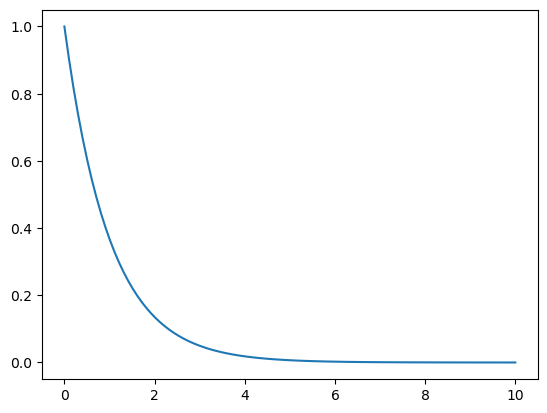

In [68]:
aa = np.linspace(0, 10, 100)
bb = np.exp(-aa)
plt.plot(aa, bb)
plt.show()

**Question: what is wrong with the graph?**

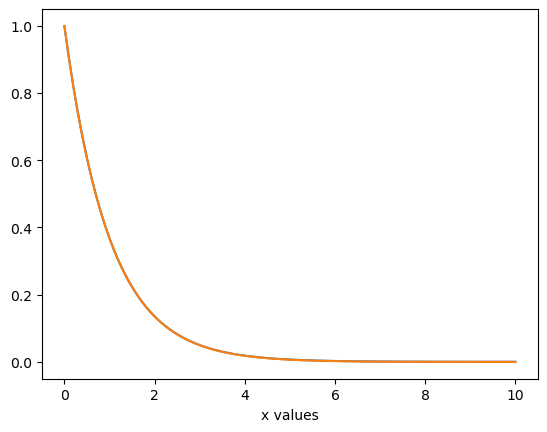

In [69]:
def f(x): 
    return np.exp(-x)
def g(x): 
    return np.exp(-x) + .001*np.random.normal(0.,1)
aa = np.linspace(0, 10, 100)
bb = f(aa)
cc = g(aa)
dd = cc-bb
plt.plot(aa, bb)
plt.plot(aa, cc)
plt.xlabel("x values")
plt.show()

#### Empirical histogram


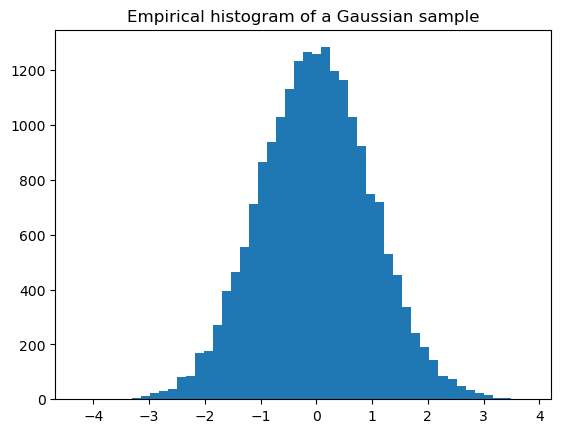

In [70]:
xx = np.random.normal(size=20000)

plt.hist(xx, bins=50)
plt.title('Empirical histogram of a Gaussian sample')
plt.show()

#### Scatter plot


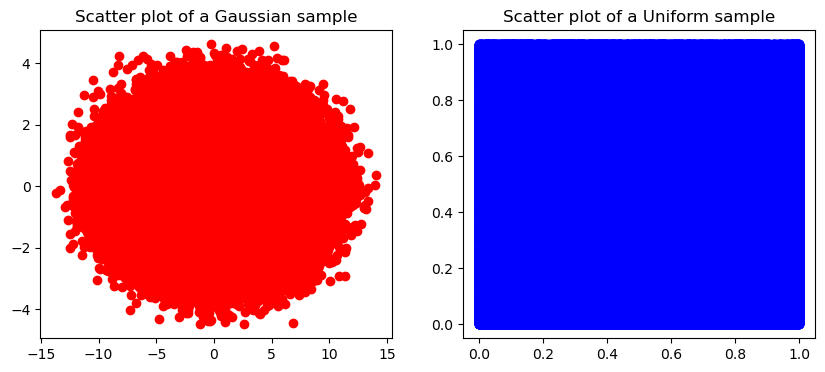

In [71]:
n = 1000000
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
plt.subplot(1, 2, 1)
aa = np.random.normal(0., 3., n)
bb = np.random.normal(0., 1., n)
plt.scatter(aa, bb, color='r')
plt.title('Scatter plot of a Gaussian sample')

plt.subplot(1, 2, 2)
aa = np.random.rand(n)
bb = np.random.rand(n)
plt.scatter(aa, bb, color='b')
plt.title('Scatter plot of a Uniform sample')
plt.show()

#### 3D Plot


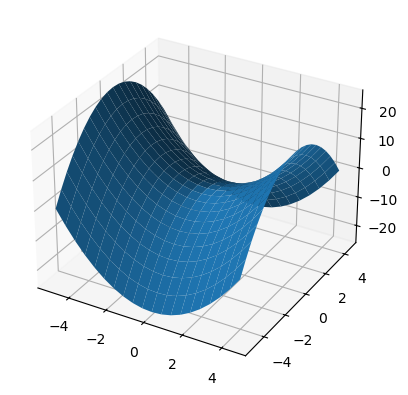

In [72]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
XX = np.arange(-5, 5, 0.5)
YY = np.arange(-5, 5, 0.5)
XX, YY = np.meshgrid(XX, YY)
ZZ = XX**2 - YY**2
surf = ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1)
plt.show()

### Seaborn


Seaborn, introduced in 2012, provides an application programming interface (API) on top of matplotlib, with similar tools, but that can be called directly from a pandas DataFrame.

https://seaborn.pydata.org/

#### Seaborn vs matplotlib

In [73]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

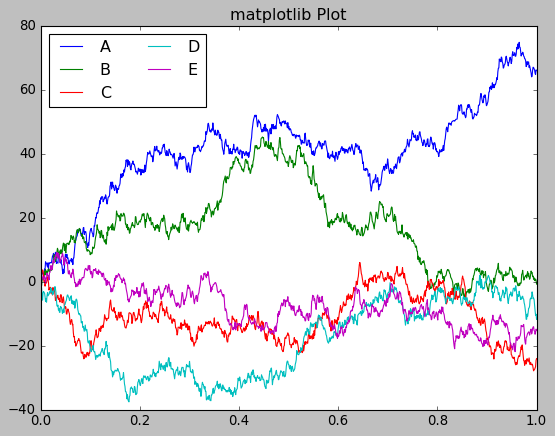

In [74]:
n, p = 1000, 5
xx = np.linspace(0., 1., n)
yy = np.cumsum(np.random.randn(n, p), axis=0)
plt.plot(xx, yy)
plt.legend('ABCDEF', ncol=2, loc="best")
plt.title("matplotlib Plot")
plt.show()

*Beware of legend location*

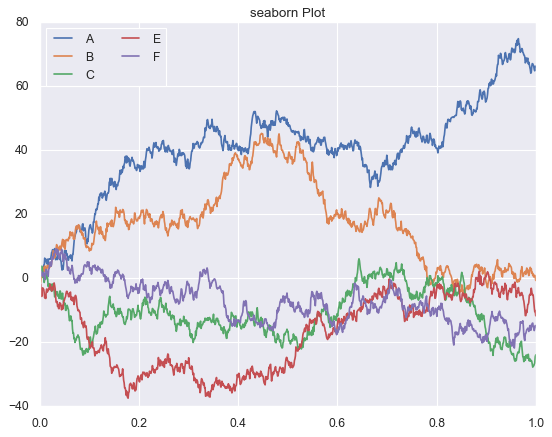

In [75]:
import seaborn as sns
sns.set()
# same plotting code as above!
plt.plot(xx, yy)
plt.legend('ABCEF', ncol=2, loc='upper left')
plt.title("seaborn Plot")
plt.show()

#### Seaborn tools


In [76]:
import pandas as pd

##### Histograms

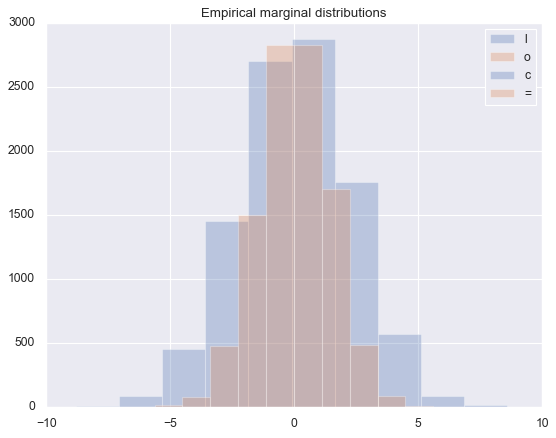

In [77]:
meanVector = [0., 0.]
covMatrix = [[5., 2.], [2., 2.]]
data = np.random.multivariate_normal(meanVector, covMatrix, size=10000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=False, alpha=0.3, label=col)
plt.legend('loc=best')
plt.title('Empirical marginal distributions')
plt.show()

C:\Users\ajacquie\AppData\Local\Temp\ipykernel_11808\1975029645.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True).set_title("Empirical marginal distributions")
C:\Users\ajacquie\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ajacquie\AppData\Local\Temp\ipykernel_11808\1975029645.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True).set_title("Empirical marginal distributions")
C:\Users\ajacquie\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

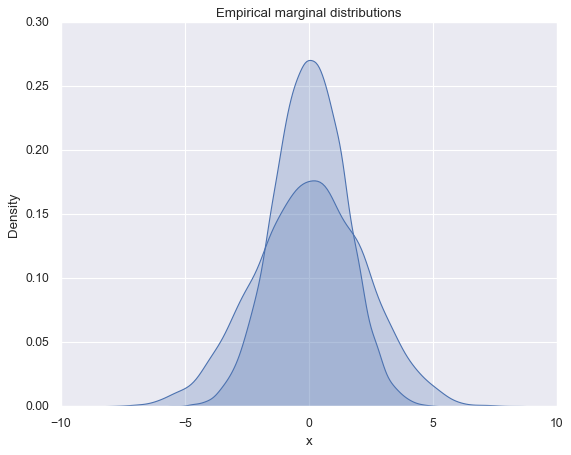

In [78]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True).set_title("Empirical marginal distributions")

https://seaborn.pydata.org/generated/seaborn.histplot.html

C:\Users\ajacquie\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ajacquie\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


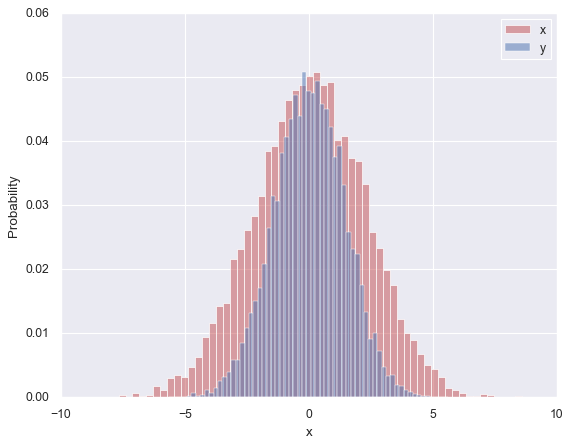

In [79]:
sns.histplot(data['x'], label='x', color="r", alpha=0.5, stat="probability")
sns.histplot(data['y'], label='y', color="b", alpha=0.5, stat="probability")
plt.legend(loc='best')
plt.show()

##### Visualising the data in 2D

In [80]:
data.head()

x         y
0  2.302742  1.398493
1  2.700908  2.279082
2  3.809694  1.299362
3  2.686227  1.729990
4  3.229595  1.945294

C:\Users\ajacquie\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ajacquie\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='x', ylabel='y'>

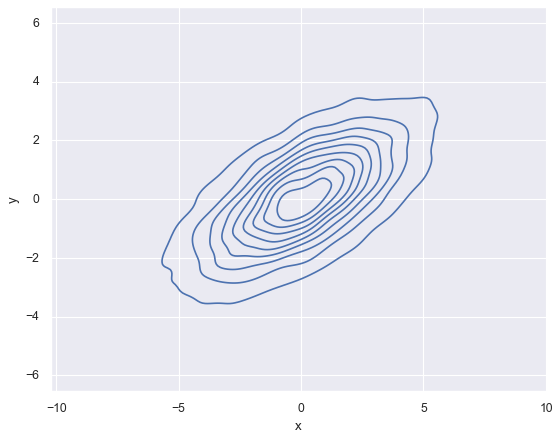

In [81]:
sns.kdeplot(data=data,x='x',y='y')

C:\Users\ajacquie\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ajacquie\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ajacquie\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ajacquie\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

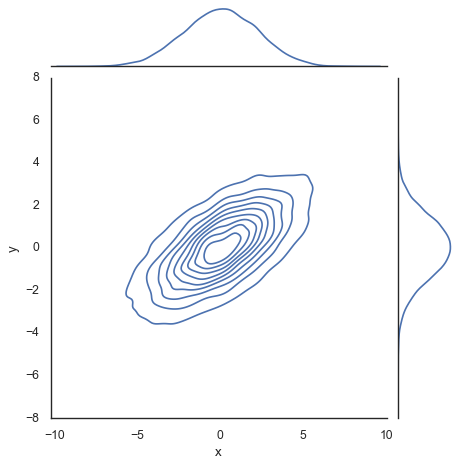

In [82]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='kde');

C:\Users\ajacquie\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ajacquie\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



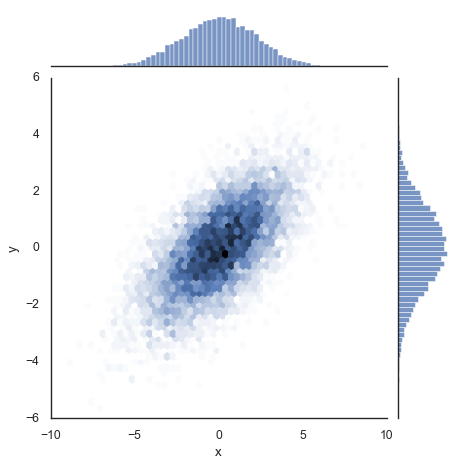

In [89]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='hex')

C:\Users\ajacquie\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ajacquie\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



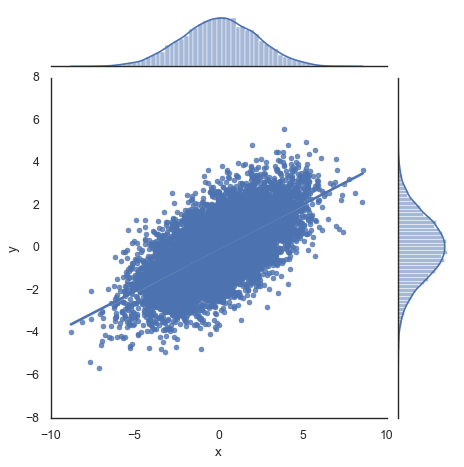

In [90]:
### With a linear regression added
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='reg')

### Plotly
Plotly provides online graphing, analytics, and statistics tools, as well as scientific graphing libraries.
https://plotly.com/

In [91]:
## %pip install plotly

In [92]:
import pandas as pd
import yahoo_fin.stock_info as si
aapl = si.get_data("aapl")
aapl.head()

open      high       low     close  adjclose     volume ticker
1980-12-12  0.128348  0.128906  0.128348  0.128348  0.098943  469033600   AAPL
1980-12-15  0.122210  0.122210  0.121652  0.121652  0.093781  175884800   AAPL
1980-12-16  0.113281  0.113281  0.112723  0.112723  0.086898  105728000   AAPL
1980-12-17  0.115513  0.116071  0.115513  0.115513  0.089049   86441600   AAPL
1980-12-18  0.118862  0.119420  0.118862  0.118862  0.091630   73449600   AAPL

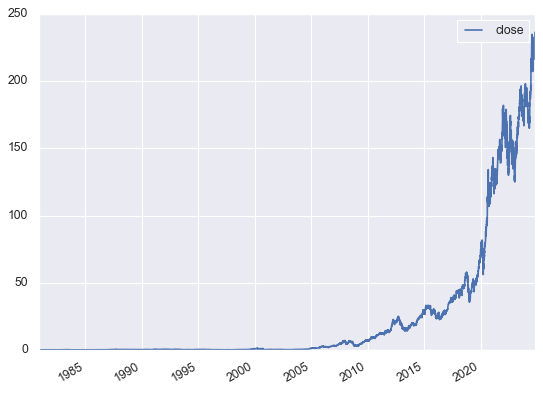

In [93]:
ax = aapl['close'].plot(legend=True)

C:\Users\ajacquie\AppData\Local\anaconda3\Lib\site-packages\plotly\matplotlylib\renderer.py:609: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



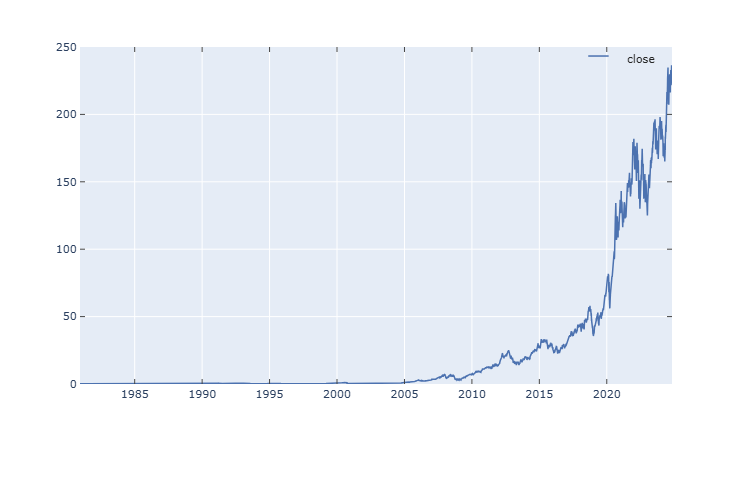

In [94]:
fig = ax.get_figure()
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode()
py.iplot_mpl(fig, strip_style=True)

### Example on Gender (im)balance in Math Finance

In [95]:
df = pd.read_excel('../Data files/Class.xlsx')
## Disclaimer: randomly generated data
df = df.set_index("CID")
df.head()

Gender     Nationality  Grade
CID                                     
938507658  Female          France     56
752604522  Female          France     90
755001529    Male  United Kingdom     90
37838787     Male          France     43
983579095  Female           China     47

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 938507658 to 229024295
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gender       51 non-null     object
 1   Nationality  55 non-null     object
 2   Grade        55 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ KB


In [97]:
variable = "Gender"

series = df.groupby(by=[variable]).count().mean(axis=1)

series
#series.sum()

Gender
Female    24.0
Male      27.0
dtype: float64

In [98]:
df["Gender"] = df["Gender"].apply(lambda x: "Other" if x not in ["Male", "Female"] else x)
series = df.groupby(by=[variable]).count().mean(axis=1)

series

Gender
Female    24.0
Male      27.0
Other      4.0
dtype: float64

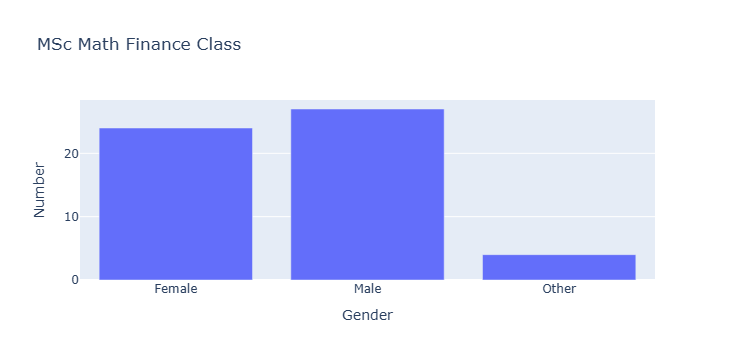

In [99]:
trace0 = go.Bar(
        x=series.index,
        y=series.values,
        name='Last year')

data = [trace0]

layout = {
        'title': 'MSc Math Finance Class',
        'xaxis': {'title': variable},
        'yaxis': {'title': 'Number'},
        'barmode': 'stack'}

py.iplot({'data': data, 'layout': layout})

### A 3D example


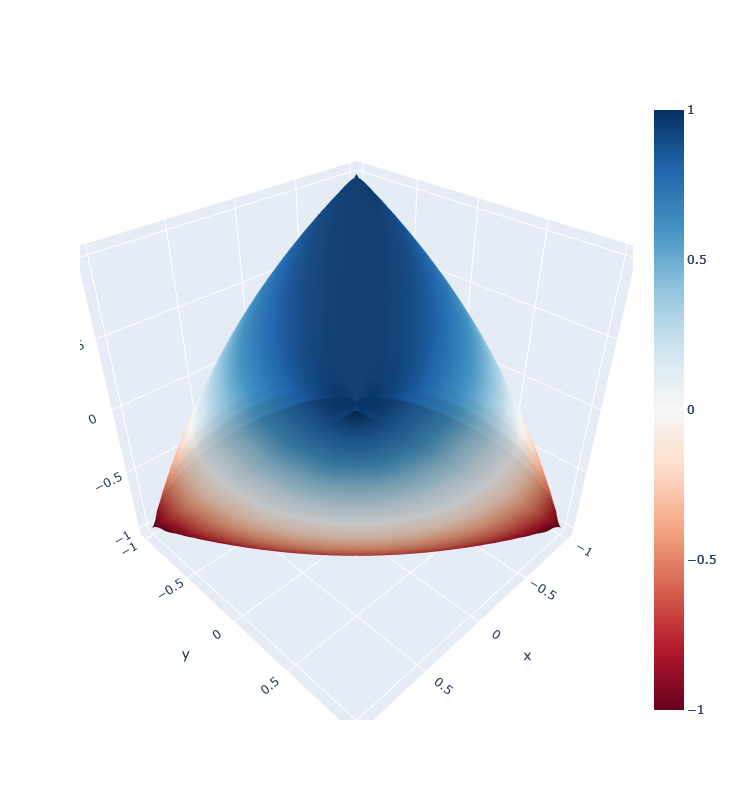

In [100]:
n = 50
a = np.linspace(-1, 1, n)
b = np.linspace(-1, 1, n)
a_, b_= np.meshgrid(a, b)
c_p = np.array([[aa * bb + np.sqrt( (1 - bb **2) * (1 - aa **2) ) for aa in a] for bb in b ])
c_m = np.array([[aa * bb - np.sqrt( (1 - bb **2) * (1 - aa **2) ) for aa in a] for bb in b ])
fig = go.Figure(data=[go.Surface(x=a,y=b,z=c_p, colorscale="RdBu"),
                     go.Surface(x=a,y=b,z=c_m, colorscale="RdBu")])
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

### Bokeh
`bokeh` helps you create interactive visualisations for modern web browsers.

https://docs.bokeh.org/

(likely origin: https://en.wikipedia.org/wiki/Bokeh)

In [101]:
## %pip install bokeh

In [102]:
import bokeh.plotting
import bokeh.io
import numpy as np

In [103]:
bokeh.io.output_notebook()

Loading BokehJS ...

In [104]:
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = ['#%02x%02x%02x' % (int(r), int(g), 150) for r, g in zip(np.floor(50+2*x), np.floor(30+2*y))]
p = bokeh.plotting.figure()
p.circle(x, y, radius=radii, fill_color=colors, fill_alpha=.5, line_color=None)
bokeh.plotting.show(p)

#### Slider's example


In [105]:
import bokeh
from bokeh import plotting
import bokeh.io
from bokeh.plotting import figure
from bokeh.io import curdoc, show
from bokeh import layouts
from bokeh.layouts import row, column #, widgetbox
from bokeh.models import ColumnDataSource
#from bokeh.models import Column
from bokeh.models.widgets import Slider, TextInput
from bokeh.io import output_notebook # enables plot interface in J notebook
from bokeh.application import Application
from bokeh.application.handlers import FunctionHandler
import numpy as np
bokeh.io.output_notebook()

Loading BokehJS ...

In [106]:
# Set up data
n = 200
xx = np.linspace(-5., 5., n)

def myfunction(xx, a, b):
    return a + b*np.cos(xx)

a0, b0 = 0.1, 1.
yy = myfunction(xx, a0, b0)

source = ColumnDataSource(data=dict(x=xx, y=yy))

# Set up plot
plot = figure(height=400, width=400, title="Function a+b*cos(x)",
              tools="crosshair,pan,reset,save,wheel_zoom",
              x_range=[np.min(xx), np.max(xx)], y_range=[np.min(yy), np.max(yy)])

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

a_slider = Slider(title="a", value=a0, start=0.01, end=1., step=0.02)
b_slider = Slider(title="b", value=b0, start=-1., end=2., step=0.1)

def update_data(attrname, old, new):
    # Get the current slider values
    a_val = a_slider.value
    b_val = b_slider.value

    # Generate the new curve
    yy = myfunction(xx, a_val, b_val)

    source.data = dict(x=xx, y=yy)

for w in [a_slider, b_slider]:
    w.on_change('value', update_data)

# Set up layouts and add to document
inputs = column(a_slider, b_slider)
layout = row(plot, column(a_slider, b_slider))

def modify_doc(doc):
    doc.add_root(row(layout, width=800))
    doc.title = "Sliders"

handler = FunctionHandler(modify_doc)
show(Application(handler))

### Sweetviz


In [107]:
import sweetviz as sv
analy = sv.analyze(aapl)
analy.show_html('analy.html')

                                             |                                             | [  0%]   00:00 ->…

Report analy.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


There exist many visualisation tools, and we will only discuss a few, the most popular:
- `matplotlib` is a `Python` plotting library similar to MATLAB.
- `pyplot` is a shell-like interface to `matplotlib`
- `pylab` imports the `numpy` library, but is discouraged.

### Visualising time series

In [108]:
ticker = "aapl"
df = si.get_data(ticker)#['open']
df=df.dropna()
df.head()

open      high       low     close  adjclose     volume ticker
1980-12-12  0.128348  0.128906  0.128348  0.128348  0.098943  469033600   AAPL
1980-12-15  0.122210  0.122210  0.121652  0.121652  0.093781  175884800   AAPL
1980-12-16  0.113281  0.113281  0.112723  0.112723  0.086898  105728000   AAPL
1980-12-17  0.115513  0.116071  0.115513  0.115513  0.089049   86441600   AAPL
1980-12-18  0.118862  0.119420  0.118862  0.118862  0.091630   73449600   AAPL

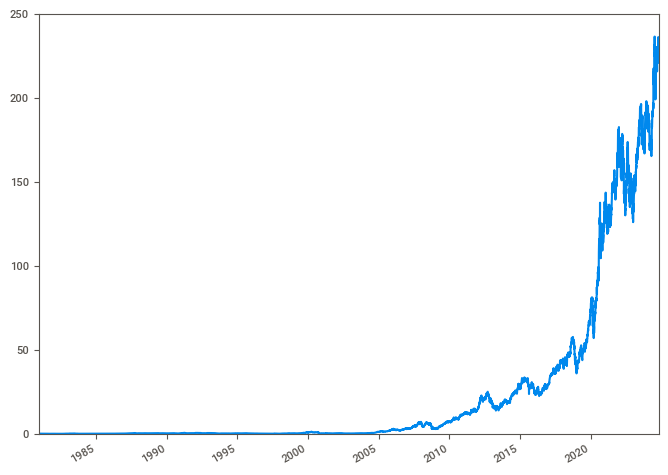

In [109]:
df["open"].plot();

**Question**: What is wrong with the graph above?

In [110]:
ticker = "aapl"
df = si.get_data(ticker, start_date = "01/01/2017")
df=df.dropna()

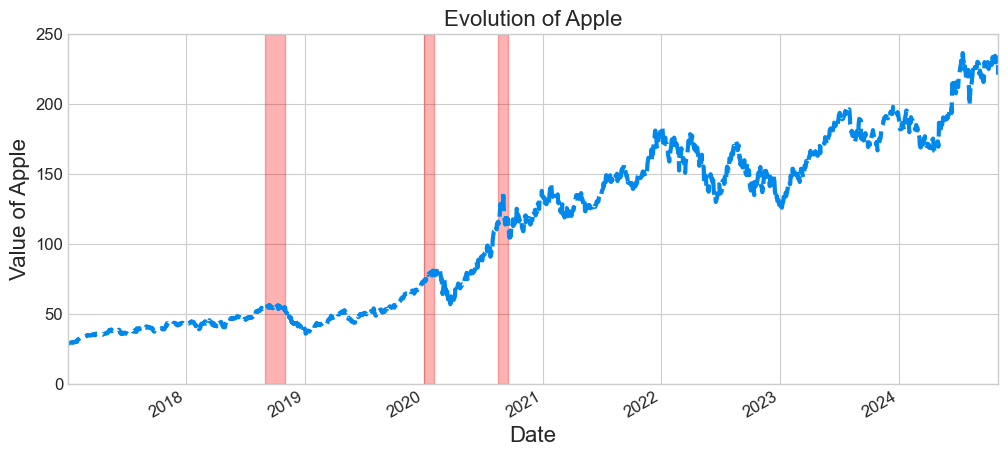

In [111]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid') ## plt.style.available
ax = df["open"].plot(figsize=(12, 5),fontsize=12,linewidth=3,linestyle='--')
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Value of Apple', fontsize=16)
ax.set_title("Evolution of Apple", fontsize=16)
ax.axvspan('2018-09-01', '2018-11-01', color='red', alpha=0.3)
ax.axvspan('2020-01-01', '2020-02-01', color='red', alpha=0.3)
ax.axvspan('2020-08-15', '2020-09-15', color='red', alpha=0.3)
plt.show()

***Clarity is key!!!***

#### Visualising correlations


Let's import all the daily data from the S&P500

In [112]:
sp = si.tickers_sp500()
tickers = ["aapl", "amzn", "ba", "BRK.A", "bac", "V", "baba", "pypl", "xom", "hal", "slb", "csco", "intc", "orcl", "ko", "cl", "pg", "wmt"]
goodtickers = []
df = pd.DataFrame()

for t in tickers:
    try:
        dfTicker = si.get_data(t)
        dfTicker = dfTicker['open']
        df = pd.concat([df, dfTicker], axis=1)
        goodtickers.append(t)
    except:
        print("Ticker ", t, " not available")

df=df.dropna()
df.columns = goodtickers
df.head()

Ticker  BRK.A  not available


aapl       amzn          ba        bac          V  \
2015-07-06 00:00:00  31.235001  21.761499  139.020004  16.780001  67.550003   
2015-07-07 00:00:00  31.472500  21.784000  140.800003  16.900000  68.110001   
2015-07-08 00:00:00  31.120001  21.717501  142.500000  16.420000  67.010002   
2015-07-09 00:00:00  30.962500  21.745001  143.889999  16.530001  67.650002   
2015-07-10 00:00:00  30.485001  22.024500  144.139999  16.799999  67.980003   

                          baba       pypl        xom        hal        slb  \
2015-07-06 00:00:00  80.559998  38.000000  82.419998  40.830002  82.870003   
2015-07-07 00:00:00  79.449997  37.720001  82.190002  40.630001  83.629997   
2015-07-08 00:00:00  76.580002  36.340000  82.250000  41.389999  83.940002   
2015-07-09 00:00:00  80.930000  35.099998  82.870003  41.540001  84.279999   
2015-07-10 00:00:00  81.129997  34.660000  82.089996  41.570000  84.279999   

                          csco       intc       orcl         ko         cl  \
2015-07-06 00:00:00  27.000000  30.240000  39.930000  39.320000  65.680000   
2015-07-07 00:00:00  27.219999  29.870001  40.040001  39.490002  66.139999   
2015-07-08 00:00:00  27.080000  29.400000  39.900002  39.990002  66.930000   
2015-07-09 00:00:00  27.379999  29.719999  40.240002  40.459999  67.150002   
2015-07-10 00:00:00  27.270000  29.200001  40.560001  40.270000  66.760002   

                            pg        wmt  
2015-07-06 00:00:00  79.610001  23.793333  
2015-07-07 00:00:00  80.059998  24.219999  
2015-07-08 00:00:00  81.209999  24.433332  
2015-07-09 00:00:00  81.750000  24.556667  
2015-07-10 00:00:00  81.230003  24.360001

In [113]:
import seaborn as sns

corrmat = df.corr(method='pearson')
np.round(corrmat, 2)

aapl  amzn    ba   bac     V  baba  pypl   xom   hal   slb  csco  intc  \
aapl  1.00  0.86 -0.22  0.72  0.92 -0.17  0.30  0.36 -0.29 -0.50  0.68 -0.10   
amzn  0.86  1.00  0.01  0.79  0.93  0.25  0.63 -0.03 -0.54 -0.75  0.78  0.30   
ba   -0.22  0.01  1.00  0.26  0.04  0.47  0.16 -0.15 -0.05 -0.14  0.42  0.55   
bac   0.72  0.79  0.26  1.00  0.78  0.17  0.54  0.10 -0.26 -0.54  0.83  0.31   
V     0.92  0.93  0.04  0.78  1.00  0.08  0.45  0.20 -0.47 -0.68  0.82  0.16   
baba -0.17  0.25  0.47  0.17  0.08  1.00  0.70 -0.79 -0.52 -0.57  0.22  0.78   
pypl  0.30  0.63  0.16  0.54  0.45  0.70  1.00 -0.64 -0.67 -0.74  0.53  0.67   
xom   0.36 -0.03 -0.15  0.10  0.20 -0.79 -0.64  1.00  0.59  0.49  0.06 -0.71   
hal  -0.29 -0.54 -0.05 -0.26 -0.47 -0.52 -0.67  0.59  1.00  0.91 -0.42 -0.49   
slb  -0.50 -0.75 -0.14 -0.54 -0.68 -0.57 -0.74  0.49  0.91  1.00 -0.65 -0.56   
csco  0.68  0.78  0.42  0.83  0.82  0.22  0.53  0.06 -0.42 -0.65  1.00  0.41   
intc -0.10  0.30  0.55  0.31  0.16  0.78  0.67 -0.71 -0.49 -0.56  0.41  1.00   
orcl  0.92  0.77 -0.14  0.66  0.86 -0.28  0.13  0.52 -0.15 -0.33  0.63 -0.22   
ko    0.90  0.73 -0.08  0.72  0.88 -0.21  0.19  0.44 -0.29 -0.48  0.69 -0.14   
cl    0.77  0.72 -0.29  0.57  0.71 -0.09  0.24  0.29 -0.20 -0.35  0.41 -0.19   
pg    0.95  0.87 -0.17  0.73  0.94 -0.06  0.37  0.24 -0.44 -0.63  0.72  0.00   
wmt   0.94  0.89 -0.08  0.73  0.95 -0.02  0.33  0.29 -0.39 -0.59  0.72 -0.02   

      orcl    ko    cl    pg   wmt  
aapl  0.92  0.90  0.77  0.95  0.94  
amzn  0.77  0.73  0.72  0.87  0.89  
ba   -0.14 -0.08 -0.29 -0.17 -0.08  
bac   0.66  0.72  0.57  0.73  0.73  
V     0.86  0.88  0.71  0.94  0.95  
baba -0.28 -0.21 -0.09 -0.06 -0.02  
pypl  0.13  0.19  0.24  0.37  0.33  
xom   0.52  0.44  0.29  0.24  0.29  
hal  -0.15 -0.29 -0.20 -0.44 -0.39  
slb  -0.33 -0.48 -0.35 -0.63 -0.59  
csco  0.63  0.69  0.41  0.72  0.72  
intc -0.22 -0.14 -0.19  0.00 -0.02  
orcl  1.00  0.85  0.79  0.86  0.93  
ko    0.85  1.00  0.73  0.92  0.88  
cl    0.79  0.73  1.00  0.77  0.82  
pg    0.86  0.92  0.77  1.00  0.93  
wmt   0.93  0.88  0.82  0.93  1.00

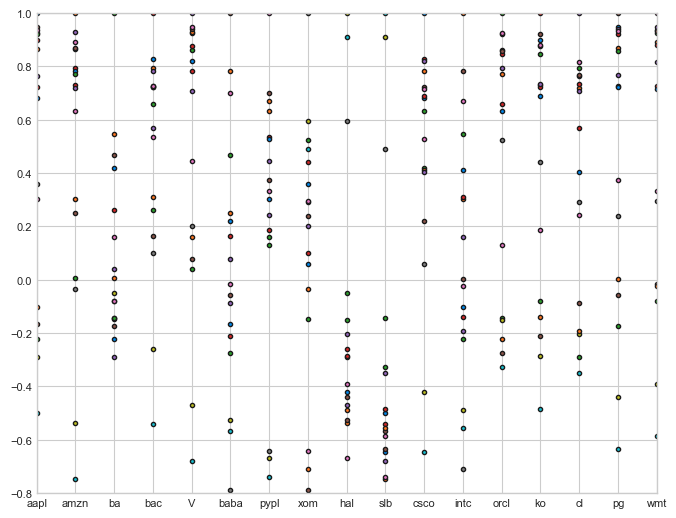

In [114]:
plt.plot(corrmat, 'o');

In [115]:
n = 10
corrmat_subset = corrmat.iloc[:n, :n]
corrmat_subset

aapl      amzn        ba       bac         V      baba      pypl  \
aapl  1.000000  0.864937 -0.220887  0.724294  0.924395 -0.167166  0.301678   
amzn  0.864937  1.000000  0.007327  0.794376  0.927597  0.248804  0.631783   
ba   -0.220887  0.007327  1.000000  0.263548  0.040916  0.467763  0.161584   
bac   0.724294  0.794376  0.263548  1.000000  0.781162  0.165001  0.536981   
V     0.924395  0.927597  0.040916  0.781162  1.000000  0.078099  0.446672   
baba -0.167166  0.248804  0.467763  0.165001  0.078099  1.000000  0.700147   
pypl  0.301678  0.631783  0.161584  0.536981  0.446672  0.700147  1.000000   
xom   0.358456 -0.034273 -0.146188  0.100470  0.200351 -0.788416 -0.641772   
hal  -0.289981 -0.537360 -0.050960 -0.260255 -0.467654 -0.524215 -0.669154   
slb  -0.500869 -0.747044 -0.143905 -0.538923 -0.679566 -0.567320 -0.741092   

           xom       hal       slb  
aapl  0.358456 -0.289981 -0.500869  
amzn -0.034273 -0.537360 -0.747044  
ba   -0.146188 -0.050960 -0.143905  
bac   0.100470 -0.260255 -0.538923  
V     0.200351 -0.467654 -0.679566  
baba -0.788416 -0.524215 -0.567320  
pypl -0.641772 -0.669154 -0.741092  
xom   1.000000  0.594761  0.490653  
hal   0.594761  1.000000  0.911504  
slb   0.490653  0.911504  1.000000

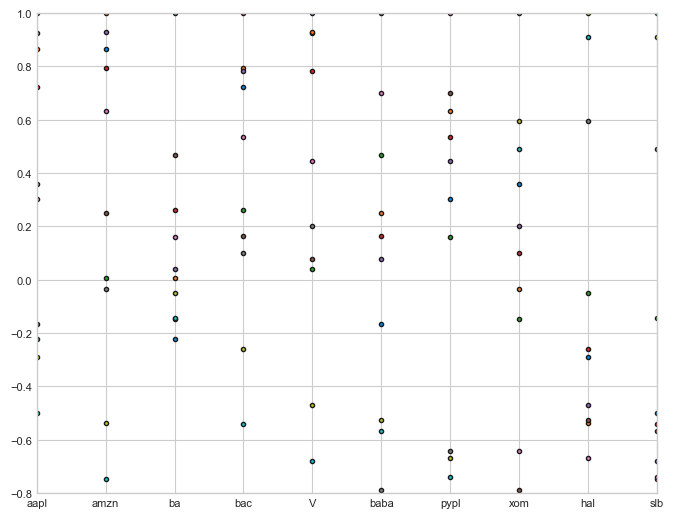

In [116]:
plt.plot(corrmat_subset, 'o');

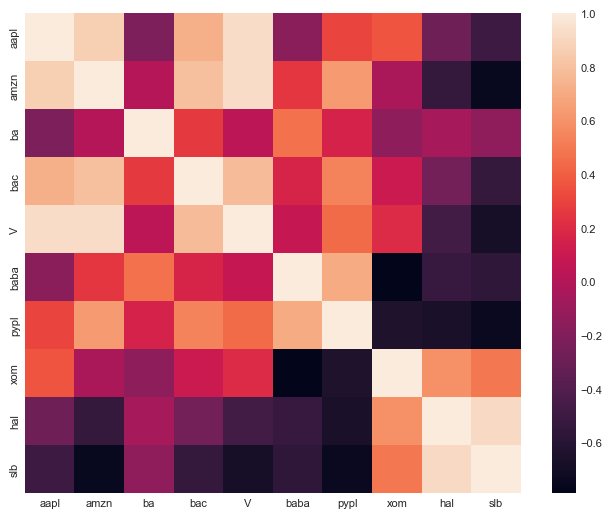

In [117]:
sns.heatmap(corrmat_subset);

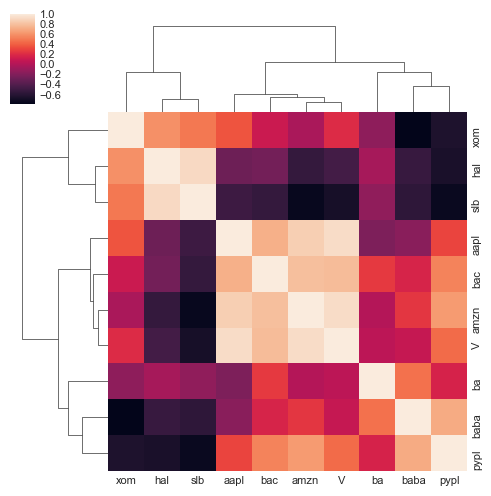

In [118]:
sns.clustermap(corrmat_subset, figsize=(5,5));

### Another example: optimal chopstick length


Source: "https://www.udacity.com/api/nodes/4576183932/supplemental_media/chopstick-effectivenesscsv/download"

Article:
S.-H. Hsu, S.-P. Wu: "An investigation for determining the optimum length of chopsticks"
 (Applied Ergonomics, Volume 22, Issue 6, December 1991, Pages 395-400)


In [119]:
import pandas as pd
import matplotlib.pylab as plt
df = pd.read_csv("../Data files/chopstick.csv")
df.head()

Food.Pinching.Efficiency  Individual  Chopstick.Length
0                     19.55           1               180
1                     27.24           2               180
2                     28.76           3               180
3                     31.19           4               180
4                     21.91           5               180

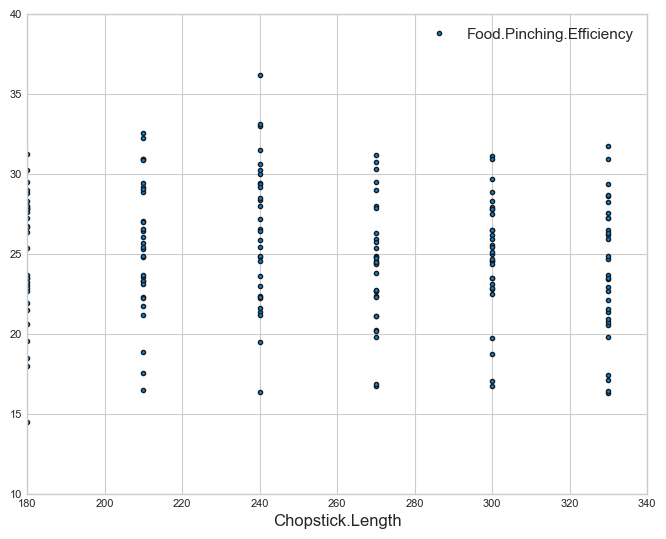

In [120]:
df.plot(x=df.columns[2], y=df.columns[0], style='o');

**Questions:**
- How many chopsticks are used every year (mostly China and Japan)?
- What is the environmental impact? https://en.wikipedia.org/wiki/Chopsticks#Global_impacts

### Word Visualisation with `WordCloud`

In [121]:
api = '878c5663b41f47dd95a62d2cb6e155cd'
import requests
import pprint
url = 'https://newsapi.org/v2/everything?'
parameters = {
    'q': 'AI', # query phrase
    'pageSize': 80,  # maximum is 100
    'apiKey': api, # your own API key
    'from': "2024-10-24" #"2022-09-30"
}
json = requests.get(url, params=parameters).json()
pprint.pprint(json)

for i in json['articles']:
    print(i['title'])
    
from wordcloud import WordCloud
import matplotlib.pyplot as plt

allText = [str(i['title'] + ' ') for i in json['articles']][0]

wordcloud = WordCloud(max_font_size=40).generate(allText)

{'articles': [{'author': 'Lawrence Bonk',
               'content': "If you click 'Accept all', we and our partners, "
                          'including 237 who are part of the IAB Transparency '
                          '&amp; Consent Framework, will also store and/or '
                          'access information on a device (in other words, use '
                          '… [+678 chars]',
               'description': 'Google CEO Sundar Pichai just revealed that AI '
                              'now generates more than a quarter of new code '
                              'for its products, according to a company '
                              'earnings call transcribed by \r\n'
                              'Ars Technica\r\n'
                              '. In other words, AI tools are already having '
                              'an absolutely mammoth impact on th…',
               'publishedAt': '2024-10-30T18:00:38Z',
               'source': {'id': None, 'name': 'Ya

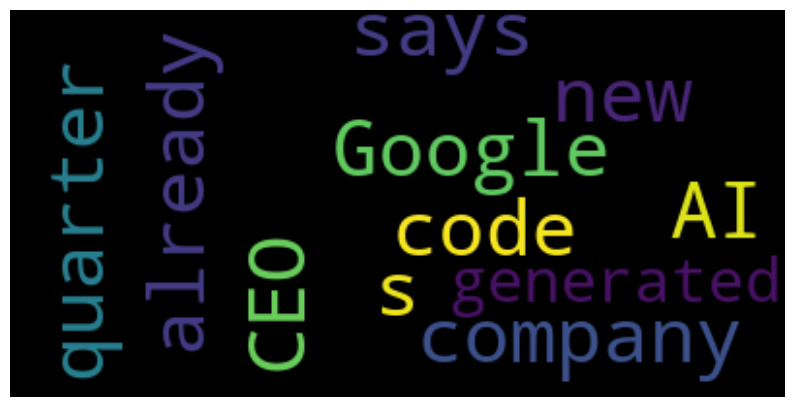

In [122]:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Big data visualisation

- Extremely large (terabytes, petabytes, exabytes, zettabytes, ....)
- Complex and unstructured

Example of (free) large datasets: https://commoncrawl.org/

Main obstacles to big data visualisation:
- Speed
- Image quality

We will be using the following database: https://s3.amazonaws.com/datashader-data/nyc_taxi_wide.parq

Full details here: https://examples.pyviz.org/nyc_taxi/nyc_taxi.html


`python` tools for data science: 
- https://www.simplilearn.com/top-python-libraries-for-data-science-article
- `pySPark` (https://spark.apache.org/docs/latest/api/python/)

In [129]:
import dask.dataframe as dd

usecols = ['dropoff_x','dropoff_y','pickup_x','pickup_y']#, 'passenger_count']
ddf = dd.read_parquet('../Data files/nyc_taxi_wide.parq', use_dictionary=False)[usecols].persist()
ddf.tail()

dropoff_x  dropoff_y   pickup_x   pickup_y
11842089 -8232492.0  4979234.5 -8232297.5  4980859.5
11842090 -8234856.5  4971131.0 -8235721.0  4972331.0
11842091 -8234202.5  4981092.5 -8235340.5  4975470.0
11842092 -8235618.5  4973722.0 -8237594.0  4973844.0
11842093 -8234151.5  4977120.0 -8233228.5  4977946.5

In [130]:
ddf.info

<bound method DataFrame.info of Dask DataFrame Structure:
              dropoff_x dropoff_y pickup_x pickup_y
npartitions=1                                      
                float32   float32  float32  float32
                    ...       ...      ...      ...
Dask Name: getitem, 1 graph layer>

## `holoviews`


In [131]:
## %pip install holoviews

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
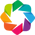

In [132]:
import numpy as np
import holoviews as hv
from holoviews import opts
from holoviews.element.tiles import StamenTerrain
hv.extension('bokeh')

In [133]:
plot_width  = int(750)
plot_height = int(plot_width//1.2)
x_range, y_range =(-8242000,-8210000), (4965000,4990000)
plot_options = hv.Options(width=plot_width, height=plot_height, xaxis=None, yaxis=None)
opts.defaults(
    opts.Points(width=plot_width, height=plot_height, size=5, color='blue'),
    opts.Overlay(width=plot_width, height=plot_height, xaxis=None, yaxis=None),
    opts.RGB(width=plot_width, height=plot_height))
tiles = StamenTerrain().redim.range(x=x_range, y=y_range)

In [134]:
samples = ddf.sample(frac=1e-4)
points_dropoff = hv.Points(samples, ['dropoff_x', 'dropoff_y'])
plot_dropoff = (tiles * points_dropoff.opts(color='b'))
print ("Number of sample points: ", len(samples.index))

Number of sample points:  1184


In [135]:
plot_dropoff

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [dropoff_x,dropoff_y]   (pickup_x,pickup_y)

### `datashader`
The following requires the 'passenger_count' field from the data above, but `parquet` seems to have some issues now with the import.
*To be updated.....*

In [ ]:
## %pip install datashader

In [136]:
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import Greys9

Greys9_r = list(reversed(Greys9))[:-2]

cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
agg = cvs.points(ddf, 'dropoff_x', 'dropoff_y',  ds.count('passenger_count'))
img = tf.shade(agg, cmap=["white", 'darkblue'], how='linear')

ValueError: specified column not found

In [ ]:
img

In [ ]:
frequencies, edges = np.histogram(agg.values, bins=100)
hv.Histogram((edges, frequencies)).opts(width=800).redim.range(Frequency=(0,80))

In [ ]:
import holoviews.operation.datashader as hd
from datashader.colors import Hot
shaded = hd.datashade(hv.Points(df, ['dropoff_x', 'dropoff_y']), cmap=Hot, aggregator=ds.count('passenger_count'))
hd.dynspread(shaded, threshold=0.5, max_px=4).opts(bgcolor='black', xaxis=None, yaxis=None, width=900, height=500)

## Further Reading
- Hans Rosling: <a href="https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen">"The best stats you've ever seen"</a> (2006).
- J. Matejka, G.  Fitzmaurice: <a href="https://damassets.autodesk.net/content/dam/autodesk/www/autodesk-reasearch/Publications/pdf/same-stats-different-graphs.pdf">Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing</a> (2017).
- C. Nussbaumer Knaflic. Storytelling with data: a data visualization guide for business professionals (2015).
- E.R. Tufte. The Visual Display of Quantitative Information, second edition (2001).
- E.R. Tufte. Visual Explanations: Images and Quantities, Evidence and Narrative (1997).
    